In [ ]:
from project_test_victor import colorization
import numpy as np
result = colorization(learning_rate=0.0001, n_epochs=500,
                    verbose=True,batch_size=1,ds_rate=1,dim_in=256/1,train_batches=45)

In [ ]:
#[test_out,bw_input,prior_boost.output,data_ab_enc]
result[0][0,:,:,:]-result[3][0,:,:,:]sssss

In [ ]:
from project_nn import dec_net_out_to_rgb
print(result[3]+1e-40)
#dec_net_out_to_rgb(result[0][0,:,:,:],result[1][0,:,:,:])

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io,measure
%load_ext autoreload
%autoreload 2
from project_nn import dec_net_out_to_rgb
%matplotlib inline
po = dec_net_out_to_rgb(result[1][0,:,:,:],result[0][0,:,:,:])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: _sum() got an unexpected keyword argument 'aixs'

In [24]:
np.shape(result[1][0,:,:,:])

(313L, 256L, 256L)

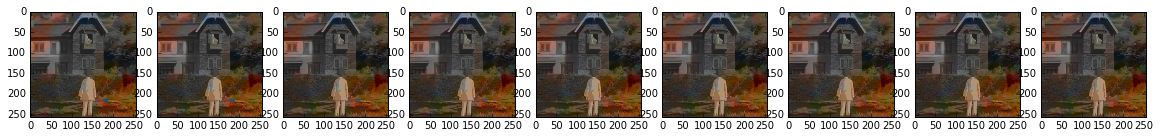

In [87]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (20.0, 10.0)
for i in range(9):
    po = dec_net_out_to_rgb(result[1][0,:,:,:],result[0][0,:,:,:]+50,i*0.1+0.1)
    plt.subplot(1,9,i+1)
    plt.imshow(color.lab2rgb(po))
plt.show()

In [38]:
temp = 0.1
ref_Qcolor_bins = numpy.load('pts_in_hull.npy')
image_net_out_matrix = numpy.exp(numpy.log(result[1][0,:,:,:].transpose(1,2,0).reshape(256*256, 313))/temp)
print(np.shape(image_net_out_matrix))

image_net_out_matrix = image_net_out_matrix/image_net_out_matrix.sum(axis=1, keepdims=True)
data_ab = numpy.dot(image_net_out_matrix, ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(1,256,256)
data_b_chan = (data_ab[:,1]).reshape(1,256,256)
img_construct = numpy.concatenate((data_a_chan, data_b_chan), axis=0)
img_construct = numpy.concatenate((data_l+50, img_construct), axis=0)
img_construct = img_construct.transpose(1,2,0)

(65536L, 313L)


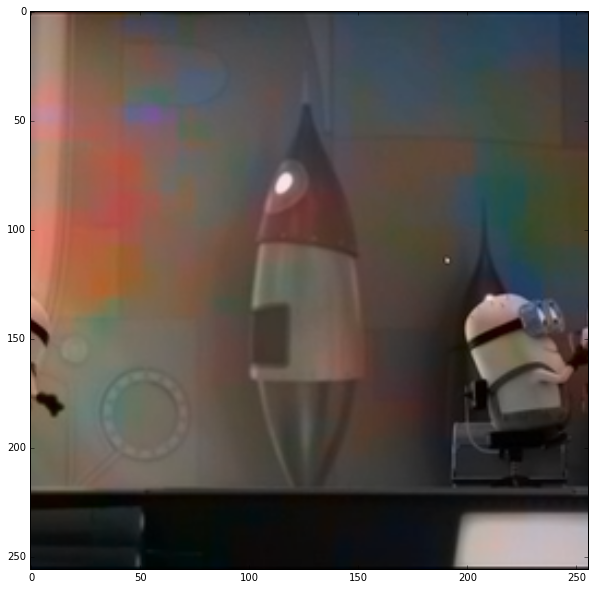

In [71]:
plt.imshow(color.lab2rgb(img_construct))

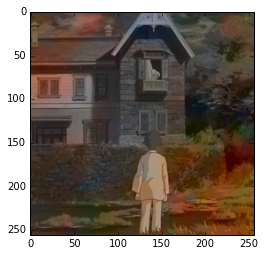

In [76]:
ind = 1
image_net_out_flattened = result[ind][0,:,:,:].flatten()
data_l = result[0][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
if ind == 1:
    data_ab = np.dot(image_net_out_flattened.reshape(313,65536).T, ref_Qcolor_bins)
else:
    data_ab = np.dot(image_net_out_flattened.reshape(65536,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(256,256,1)
data_b_chan = (data_ab[:,1]).reshape(256,256,1)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=2)
img_construct = np.concatenate((data_l[:,:,:].reshape(256,256,1)+50, img_construct), axis=2)
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [23]:
np.shape(result[0][0,:,:,:].transpose(1,2,0))

(256L, 256L, 1L)

In [77]:
ind = 0
image_net_out_flattened = result[ind][0,:,:,:].flatten()
data_l = result[1][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
if ind == 0:
    data_ab = np.dot(image_net_out_flattened.reshape(313,4096).T, ref_Qcolor_bins)
else:
    data_ab = np.dot(image_net_out_flattened.reshape(4096,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(64,64,1)
data_b_chan = (data_ab[:,1]).reshape(64,64,1)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=2)
img_construct = np.concatenate((data_l[:,::4,::4].reshape(64,64,1)+50, img_construct), axis=2)
#img_construct = img_construct.transpose(1,2,0)import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

ValueError: total size of new array must be unchanged

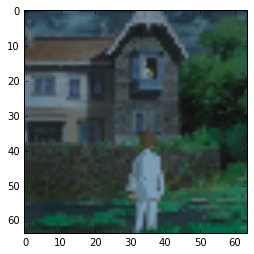

In [85]:
ind = 2
image_net_out_flattened = result[ind][0].flatten()
data_l = result[0][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
if ind == 0:
    data_ab = np.dot(image_net_out_flattened.reshape(313,4096).T, ref_Qcolor_bins)
else:
    data_ab = np.dot(image_net_out_flattened.reshape(4096,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(64,64,1)
data_b_chan = (data_ab[:,1]).reshape(64,64,1)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=2)
img_construct = np.concatenate((data_l[:,::4,::4].reshape(64,64,1)+50, img_construct), axis=2)
#img_construct = img_construct.transpose(1,2,0)import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [84]:
np.shape(result[2])

(5L, 1282048L)

In [ ]:

ref_prior = np.load('./prior_probs.npy')

In [ ]:
np.shape(ab_enc)

In [ ]:

from matplotlib import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [ ]:
import numpy as np
from project_test_mehmet import load_data
from project_util import encode_ab_to_Q 

data_set = load_data('data', False)
data_a_chan = data_set[1][219][:64*64]
data_b_chan = data_set[1][219][64*64:2*64*64]
distances, indices, wts = encode_ab_to_Q(data_a_chan, data_b_chan)

In [ ]:
img_enc = np.zeros((64*64, 313 ))
x_ind =np.arange(0,4096,dtype='int')[:,np.newaxis]
img_enc[x_ind, indices] = wts
img_flt = img_enc.flatten()
print img_flt.reshape(4096,313)[0]

In [ ]:
import urllib2
from bs4 import BeautifulSoup
import os, sys
from PIL import Image
from resizeimage import resizeimage
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io
import theano
%matplotlib inline

data_l = ((result[0][3]).reshape(1,256,256)).transpose(1,2,0)
data_ab_y = ((result[1][3]).reshape(2,256,256)).transpose(1,2,0)
data_ab_nn = ((result[2][3]).reshape(2,256,256)).transpose(1,2,0)
img_construct = np.concatenate((data_l.astype(np.float64),data_ab_nn.astype(np.float64)), axis=2)
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [20]:
hello = None

In [19]:
print(loaded_objects[0])

None


In [16]:

loaded_objects = []
for i in range(30):
    loaded_objects.append(None)

In [5]:
toot4

array([[[[  6.43436164e-02,  -8.67165327e-02,   3.19577381e-02],
         [ -1.04576247e-02,   8.44743475e-03,   1.33772343e-02],
         [ -4.51663509e-02,  -6.60700649e-02,   7.10446015e-02]]],


       [[[ -1.04782306e-01,  -2.12384611e-02,  -1.33043891e-02],
         [  3.02717369e-02,  -5.50523773e-02,   9.51917768e-02],
         [  3.04410309e-02,  -9.92229134e-02,   7.89711177e-02]]],


       [[[ -6.97933882e-02,  -6.54819757e-02,  -7.44149238e-02],
         [ -2.46289186e-02,   3.22215346e-04,   4.52734716e-02],
         [  3.07146497e-02,  -3.94246839e-02,  -7.60574713e-02]]],


       [[[  5.41868433e-02,  -2.87240539e-02,   7.35241920e-02],
         [ -9.15712956e-03,   5.17661795e-02,  -4.76372316e-02],
         [  7.93451071e-02,  -2.55744997e-02,  -5.28877340e-02]]],


       [[[ -3.43292467e-02,   9.77592990e-02,   3.83064076e-02],
         [  6.25892803e-02,   2.81884652e-02,  -7.23556355e-02],
         [  2.50429828e-02,  -5.60539961e-02,   8.25391188e-02]]],


     

In [1]:
from Colorization_Network import colorization

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 4007)


In [2]:
test = colorization()

In [3]:
test.build_model(batch_size=5,filename='tester1.save')

... building the model


In [20]:
#test.save_params('tester1.save')

In [4]:
test.train_network(n_epochs=500,learning_rate=0.0002,batch_num=1)

Loading Batch 1
(200L, 65536L)
Current training data size is 200
... training
('training @ iter = ', 0L)
epoch 1, minibatch 1/40, loss of 122109.625000
Loading Batch 2
(200L, 65536L)
('training @ iter = ', 40L)
epoch 2, minibatch 1/40, loss of 82340.523438
Loading Batch 3
(200L, 65536L)
('training @ iter = ', 80L)
epoch 3, minibatch 1/40, loss of 80718.968750
Loading Batch 4
(200L, 65536L)
('training @ iter = ', 120L)
epoch 4, minibatch 1/40, loss of 80031.101562
Loading Batch 5
(200L, 65536L)
('training @ iter = ', 160L)
epoch 5, minibatch 1/40, loss of 79610.625000
Loading Batch 6
(200L, 65536L)
('training @ iter = ', 200L)
epoch 6, minibatch 1/40, loss of 79260.054688
Loading Batch 7
(200L, 65536L)
('training @ iter = ', 240L)
epoch 7, minibatch 1/40, loss of 79137.648438
Loading Batch 8
(200L, 65536L)
('training @ iter = ', 280L)
epoch 8, minibatch 1/40, loss of 79025.734375
Loading Batch 9
(200L, 65536L)
('training @ iter = ', 320L)
epoch 9, minibatch 1/40, loss of 78959.187500
Lo

In [ ]:
test.train_network(n_epochs=1000,learning_rate=0.0002,batch_num=1)

Loading Batch 1
(200L, 65536L)
Current training data size is 200
... training
('training @ iter = ', 0L)
epoch 1, minibatch 1/40, loss of 45853.199219
Loading Batch 2
(200L, 65536L)
('training @ iter = ', 40L)
epoch 2, minibatch 1/40, loss of 125945.476562


In [75]:
result = test.test_network(batch_ind=2,ind=3)

Loading Batch 2
(200L, 65536L)
Current test data size is 200


In [50]:
from six.moves import cPickle
f = open('bleh.save', 'wb')
for obj in [test.convrelu1_1.params,
            test.convrelu1_1.W,
            test.convrelu1_1.b,
            test.convrelu1_2.params,
            test.convrelu1_2.W,
            test.convrelu1_2.b,
            test.bn_1.params,
            test.bn_1.gamma, 
            test.bn_1.beta,
            test.convrelu2_1.params,
            test.convrelu2_1.W,
            test.convrelu2_1.b,
            test.convrelu2_2.params,
            test.convrelu2_2.W,
            test.convrelu2_2.b,
            test.bn_2.params,
            test.bn_2.gamma, 
            test.bn_2.beta,
            test.convrelu3_1.params,
            test.convrelu3_1.W,
            test.convrelu3_1.b,
            test.convrelu3_2.params,
            test.convrelu3_2.W,
            test.convrelu3_2.b,
            test.convrelu3_3.params,
            test.convrelu3_3.W,
            test.convrelu3_3.b,
            test.bn_3.params,
            test.bn_3.gamma, 
            test.bn_3.beta,
            test.convrelu4_1.params,
            test.convrelu4_1.W,
            test.convrelu4_1.b,
            test.convrelu4_2.params,
            test.convrelu4_2.W,
            test.convrelu4_2.b,
            test.convrelu4_3.params,
            test.convrelu4_3.W,
            test.convrelu4_3.b,
            test.bn_4.params,
            test.bn_4.gamma, 
            test.bn_4.beta,
            test.convrelu5_1.params,
            test.convrelu5_1.W,
            test.convrelu5_1.b,
            test.convrelu5_2.params,
            test.convrelu5_2.W,
            test.convrelu5_2.b,
            test.convrelu5_3.params,
            test.convrelu5_3.W,
            test.convrelu5_3.b,
            test.bn_5.params,
            test.bn_5.gamma, 
            test.bn_5.beta,
            test.convrelu6_1.params,
            test.convrelu6_1.W,
            test.convrelu6_1.b,
            test.convrelu6_2.params,
            test.convrelu6_2.W,
            test.convrelu6_2.b,
            test.convrelu6_3.params,
            test.convrelu6_3.W,
            test.convrelu6_3.b,
            test.bn_6.params,
            test.bn_6.gamma, 
            test.bn_6.beta,
            test.convrelu7_1.params,
            test.convrelu7_1.W,
            test.convrelu7_1.b,
            test.convrelu7_2.params,
            test.convrelu7_2.W,
            test.convrelu7_2.b,
            test.convrelu7_3.params,
            test.convrelu7_3.W,
            test.convrelu7_3.b,
            test.bn_7.params,
            test.bn_7.gamma, 
            test.bn_7.beta,
            test.convrelu8_1.params,
            test.convrelu8_1.W,
            test.convrelu8_1.b,
            test.convrelu8_2.params,
            test.convrelu8_2.W,
            test.convrelu8_2.b,
            test.convrelu8_3.params,
            test.convrelu8_3.W,
            test.convrelu8_3.b,
            test.class8_313_rh.params,
            test.class8_313_rh.W,
            test.class8_313_rh.b]:
     cPickle.dump(obj, f, protocol=cPickle.HIGHEST_PROTOCOL)
f.close()

In [5]:
from six.moves import cPickle
f = open('obj.save', 'rb')
loaded_objects = []
for i in range(30):
    loaded_objects.append(cPickle.load(f))
    print(i)
f.close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [43]:
loaded_objects[0][0].get_value()

array([[[[  6.43436164e-02,  -8.67165327e-02,   3.19577381e-02],
         [ -1.04576247e-02,   8.44743475e-03,   1.33772343e-02],
         [ -4.51663509e-02,  -6.60700649e-02,   7.10446015e-02]]],


       [[[ -1.04782306e-01,  -2.12384611e-02,  -1.33043891e-02],
         [  3.02717369e-02,  -5.50523773e-02,   9.51917768e-02],
         [  3.04410309e-02,  -9.92229134e-02,   7.89711177e-02]]],


       [[[ -6.97933882e-02,  -6.54819757e-02,  -7.44149238e-02],
         [ -2.46289186e-02,   3.22215346e-04,   4.52734716e-02],
         [  3.07146497e-02,  -3.94246839e-02,  -7.60574713e-02]]],


       [[[  5.41868433e-02,  -2.87240539e-02,   7.35241920e-02],
         [ -9.15712956e-03,   5.17661795e-02,  -4.76372316e-02],
         [  7.93451071e-02,  -2.55744997e-02,  -5.28877340e-02]]],


       [[[ -3.43292467e-02,   9.77592990e-02,   3.83064076e-02],
         [  6.25892803e-02,   2.81884652e-02,  -7.23556355e-02],
         [  2.50429828e-02,  -5.60539961e-02,   8.25391188e-02]]],


     

In [7]:
loaded_objects[0][1].get_value()

array([-0.02292555, -0.00355633, -0.02928761, -0.05365085, -0.0219304 ,
       -0.02443498, -0.04241233, -0.00021338, -0.01818323, -0.01692109,
       -0.00398632, -0.00745435, -0.00224957,  0.00679152, -0.03167028,
       -0.04095249, -0.02722285, -0.0161521 , -0.03849278, -0.02285911,
       -0.01718839, -0.03992419, -0.00499192, -0.02000147, -0.02862501,
       -0.02234182, -0.01946037, -0.02926019, -0.01539679, -0.0386928 ,
       -0.01698142, -0.03691433, -0.03240001,  0.00464858, -0.02427125,
       -0.01862257, -0.04620938, -0.01890335, -0.03564104, -0.02610782,
       -0.04187919, -0.03426648,  0.00964749, -0.04074897, -0.00543038,
        0.0023336 , -0.01798583, -0.04619662, -0.01284954,  0.0013301 ,
       -0.04360133, -0.02387646, -0.02330904, -0.01368327, -0.02631341,
       -0.00242809, -0.02389475, -0.02884516, -0.02314228, -0.03060117,
       -0.02863482, -0.00399091, -0.01249608, -0.03516193], dtype=float32)

In [11]:
test.convrelu1_1.params[1].get_value()

array([-0.02292555, -0.00355633, -0.02928761, -0.05365085, -0.0219304 ,
       -0.02443498, -0.04241233, -0.00021338, -0.01818323, -0.01692109,
       -0.00398632, -0.00745435, -0.00224957,  0.00679152, -0.03167028,
       -0.04095249, -0.02722285, -0.0161521 , -0.03849278, -0.02285911,
       -0.01718839, -0.03992419, -0.00499192, -0.02000147, -0.02862501,
       -0.02234182, -0.01946037, -0.02926019, -0.01539679, -0.0386928 ,
       -0.01698142, -0.03691433, -0.03240001,  0.00464858, -0.02427125,
       -0.01862257, -0.04620938, -0.01890335, -0.03564104, -0.02610782,
       -0.04187919, -0.03426648,  0.00964749, -0.04074897, -0.00543038,
        0.0023336 , -0.01798583, -0.04619662, -0.01284954,  0.0013301 ,
       -0.04360133, -0.02387646, -0.02330904, -0.01368327, -0.02631341,
       -0.00242809, -0.02389475, -0.02884516, -0.02314228, -0.03060117,
       -0.02863482, -0.00399091, -0.01249608, -0.03516193], dtype=float32)